In [10]:
import numpy as np
import pandas as pd

In [327]:
lda_matrix = pd.read_csv('lda_matrix.csv')
lda_matrix.set_index('title', inplace=True)
lda_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
title,,,,,,
A Scotsmans Shepherd Pie,0.0,0.139167,0.850977,0.000000,0.0,0.000000
A Simply Perfect Roast Turkey,0.0,0.000000,0.000000,0.952821,0.0,0.000000
Absolute Best Liver And Onions,0.0,0.000000,0.960303,0.000000,0.0,0.000000
Accidental Fish,0.0,0.767655,0.000000,0.000000,0.0,0.210831
Actually Delicious Turkey Burgers,0.0,0.000000,0.952817,0.000000,0.0,0.000000


# Content-based Recommender 
## Cosine Similarity

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [328]:
lda_array = lda_matrix.to_numpy()

In [329]:
lda_array

array([[0.        , 0.13916731, 0.85097736, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.95282054, 0.        ,
        0.        ],
       [0.        , 0.        , 0.96030283, 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.7541129 , 0.2273636 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.61786526, 0.        , 0.        ,
        0.3694734 ],
       [0.95688057, 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [330]:
lda_array.shape

(958, 6)

In [331]:
cosine_sim = cosine_similarity(lda_array)

In [332]:
cosine_sim.shape

(958, 958)

In [333]:
# creating a Series for recipe titles
indices = pd.Series(lda_matrix.index)

In [334]:
# define a function to take in recipe title and return the top 10 recommended recipes
def recommender(title, df=lda_matrix, cosine_sim=cosine_sim, top_n=10):
    
    # initialize an empty list of recommended recipes
    rec_recipes = []
    
    # get the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # getting the indexes of the n most similar movies
    top_n_idx = score_series.iloc[1:top_n+1].index.tolist()
    
    # get the title of the top n matching recipes
    for i in top_n_idx:
        rec_recipes.append(df.index[i])
        
    return rec_recipes

In [427]:
options = ['A Scotsmans Shepherd Pie']
total_rec_recipes = []
for title in options:
    rec_recipes = recommender(title, top_n=100)
    total_rec_recipes.extend(rec_recipes)

In [374]:
len(total_rec_recipes)

100

# Validation 
## Mean Similarity

In [337]:
def mean_similarity(title_list, df=lda_matrix):
    """
    Calculate mean cosine similarity of two or more recipes
    """
    array = lda_matrix.loc[title_list,:].to_numpy()
    cosine_sim = cosine_similarity(array)
    n_recipe = len(title_list)
    if n_recipe == 2:
        sim_score = np.round(cosine_sim[0, 1], 2)
    elif n_recipe > 2:
        sim_score = np.round(cosine_sim[0, 1:n_recipe].mean(), 2)
    else:
        print('Please choose at least two recipes to compare.')
    
    return sim_score

In [341]:
mean_similarity(total_rec_recipes)

0.98

# Optimizaiton

In [179]:
df_nutrient = df[['title','calorie','protein_g','carb_g','fat_g','servings','ratings','cook_time','link']]
df_nutrient.set_index('title', inplace=True)
df_nutrient.head()

,calorie,protein_g,carb_g,fat_g,servings,ratings,cook_time,link
title,,,,,,,,
Baked Haddock,325.0,27.7,17.0,15.7,4.0,4.59,25,https://www.allrecipes.com/recipe/100195/baked...
Beef Bulgogi,232.0,16.2,12.4,13.2,4.0,4.79,75,https://www.allrecipes.com/recipe/100606/beef-...
Apricot Brown Sugar Ham,801.0,56.1,14.4,56.2,15.0,4.72,120,https://www.allrecipes.com/recipe/102159/apric...
Taco Stuffed Shells,361.0,19.8,30.4,17.6,8.0,4.55,80,https://www.allrecipes.com/recipe/103503/taco-...
Blackened Tuna Steaks With Mango Salsa,458.0,42.1,18.3,24.7,4.0,4.85,235,https://www.allrecipes.com/recipe/103535/black...


In [238]:
df_nutrient['protein_ratio'] = np.round(df_nutrient.protein_g * 4 / df_nutrient.calorie, 2)
df_nutrient['carb_ratio'] = np.round(df_nutrient.carb_g * 4 / df_nutrient.calorie, 2)
df_nutrient['fat_ratio'] = np.round(df_nutrient.fat_g * 9 / df_nutrient.calorie, 2)
df_nutrient.head()

,calorie,protein_g,carb_g,fat_g,fat_ratio,servings,ratings,cook_time,link,protein_ratio,carb_ratio
title,,,,,,,,,,,
Baked Haddock,325.0,27.7,17.0,15.7,0.43,4.0,4.59,25,https://www.allrecipes.com/recipe/100195/baked...,0.34,0.21
Beef Bulgogi,232.0,16.2,12.4,13.2,0.51,4.0,4.79,75,https://www.allrecipes.com/recipe/100606/beef-...,0.28,0.21
Apricot Brown Sugar Ham,801.0,56.1,14.4,56.2,0.63,15.0,4.72,120,https://www.allrecipes.com/recipe/102159/apric...,0.28,0.07
Taco Stuffed Shells,361.0,19.8,30.4,17.6,0.44,8.0,4.55,80,https://www.allrecipes.com/recipe/103503/taco-...,0.22,0.34
Blackened Tuna Steaks With Mango Salsa,458.0,42.1,18.3,24.7,0.49,4.0,4.85,235,https://www.allrecipes.com/recipe/103535/black...,0.37,0.16


In [239]:
df_nutrient = df_nutrient[['calorie','protein_g','carb_g','fat_g','protein_ratio','carb_ratio','fat_ratio',
                           'servings','ratings','cook_time','link']]
df_nutrient.head(1)

,calorie,protein_g,carb_g,fat_g,protein_ratio,carb_ratio,fat_ratio,servings,ratings,cook_time,link
title,,,,,,,,,,,
Baked Haddock,325.0,27.7,17.0,15.7,0.34,0.21,0.43,4.0,4.59,25,https://www.allrecipes.com/recipe/100195/baked...


In [422]:
# save df_nutrient
df_nutrient.to_csv('dinner_nutrient.csv')

In [3]:
df_nutrient = pd.read_csv('dinner_nutrient.csv')
df_nutrient.set_index('title', inplace=True)
df_nutrient.head()

,calorie,protein_g,carb_g,fat_g,protein_ratio,carb_ratio,fat_ratio,servings,ratings,cook_time,link
title,,,,,,,,,,,
Baked Haddock,325.0,27.7,17.0,15.7,0.34,0.23,0.43,4.0,4.59,25,https://www.allrecipes.com/recipe/100195/baked...
Beef Bulgogi,232.0,16.2,12.4,13.2,0.28,0.21,0.51,4.0,4.79,75,https://www.allrecipes.com/recipe/100606/beef-...
Apricot Brown Sugar Ham,801.0,56.1,14.4,56.2,0.28,0.09,0.63,15.0,4.72,120,https://www.allrecipes.com/recipe/102159/apric...
Taco Stuffed Shells,361.0,19.8,30.4,17.6,0.22,0.34,0.44,8.0,4.55,80,https://www.allrecipes.com/recipe/103503/taco-...
Blackened Tuna Steaks With Mango Salsa,458.0,42.1,18.3,24.7,0.37,0.14,0.49,4.0,4.85,235,https://www.allrecipes.com/recipe/103535/black...


In [9]:
df_nutrient[(df_nutrient.cook_time <= 30) & (df_nutrient.cook_time != 0)].shape

(156, 11)

In [424]:
# optimize recommendation
def optimize_recipe(rec_recipes):
    """
    Optimize recipes by setting nutrition thresholds
    """
    protein_cut = 16 # set protein threshold
    fat_cut = 0.35 # set fat_ratio threshold
    calorie_cut = 500 # set calorie threshold 
    
    # create a new rec dict
    new_rec = {'recipe': [], 'link': [], 'calorie': [], 'protein': [], 'protein ratio': [], 'fat ratio': [], 
               'carb ratio': [], 'your serving': [], 'recipe serving': []}
    
    while len(rec_recipes) > 0:
        if len(new_rec['recipe']) == 3:
            df = pd.DataFrame(new_rec, index=[['Day 1','Day 2','Day 3']])
            for i in range(3):
                print_rec(df, i)
                plot_nutrient(df, i)
            return 
        
        recipe = np.random.choice(rec_recipes)  
        rec_recipes.remove(recipe)      
                
        # check fat
        if df_nutrient.loc[recipe].fat_ratio > fat_cut:
            continue
        # check calorie
        if df_nutrient.loc[recipe].calorie > calorie_cut:
            portion = np.round(calorie_cut/df_nutrient.loc[recipe].calorie, 2) 
            protein = np.round(df_nutrient.loc[recipe].protein_g * portion)
            # check protein
            if protein < protein_cut:
                continue
            calorie = np.round(df_nutrient.loc[recipe].calorie * portion) 
            protein_ratio = df_nutrient.loc[recipe].protein_ratio
            fat_ratio = df_nutrient.loc[recipe].fat_ratio
            carb_ratio = df_nutrient.loc[recipe].carb_ratio
            serving = df_nutrient.loc[recipe].servings
            link = df_nutrient.loc[recipe].link
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['carb ratio'].append(carb_ratio)
            new_rec['your serving'].append(portion)
            new_rec['recipe serving'].append(serving)
        else:
            portion = np.round(calorie_cut/df_nutrient.loc[recipe].calorie, 2) 
            protein = np.round(df_nutrient.loc[recipe].protein_g * portion)
            # check protein
            if protein < protein_cut:
                continue
            calorie = np.round(df_nutrient.loc[recipe].calorie * portion) 
            protein_ratio = df_nutrient.loc[recipe].protein_ratio
            fat_ratio = df_nutrient.loc[recipe].fat_ratio
            carb_ratio = df_nutrient.loc[recipe].carb_ratio
            serving = df_nutrient.loc[recipe].servings
            link = df_nutrient.loc[recipe].link
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['carb ratio'].append(carb_ratio)
            new_rec['your serving'].append(portion)
            new_rec['recipe serving'].append(serving)

    print('Running out of recipes. Please start over and choose more preferred meals.')
    return

In [425]:
def print_rec(df, i):
    """
    Print recommendation
    """
    serving = df['your serving'][i]
    recipe = df['recipe'][i]
    calorie = df['calorie'][i]
    link = df['link'][i]
    print(f'Your day 1 meal is {serving} serving(s) of "{recipe}" with {calorie} kcal at:\n{link}.')

In [432]:
def plot_nutrient(df, i):
    """
    Plot nutrient ratios
    """
    labels = ['Carbohydrate', 'Protein', 'Fat']
    sizes = [df['carb ratio'][i], df['protein ratio'][i], df['fat ratio'][i]]
    colors = ['lightcoral', 'lightskyblue', 'gold']

    # plot
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, counterclock = False, radius=100)
    plt.axis('square')
    plt.tight_layout()
    plt.show();

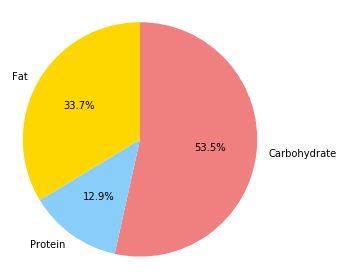

In [433]:
plot_nutrient(df, 0)

Your day 1 meal is 1.15 serving(s) of "Wiener Schnitzel" with 500.0 kcal at:
https://www.allrecipes.com/recipe/47599/wiener-schnitzel/.


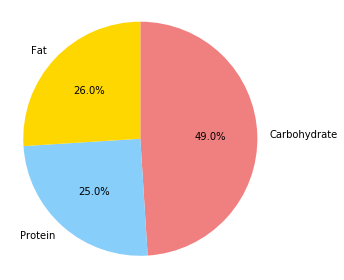

Your day 1 meal is 1.22 serving(s) of "Chef Johns Potato Gnocchi" with 501.0 kcal at:
https://www.allrecipes.com/recipe/255020/chef-johns-potato-gnocchi/.


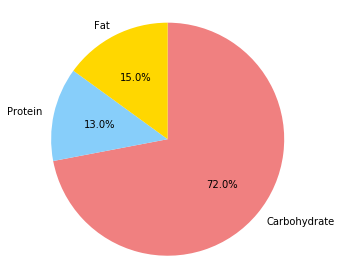

Your day 1 meal is 1.71 serving(s) of "Pams Bierocks" with 501.0 kcal at:
https://www.allrecipes.com/recipe/23658/pams-bierocks/.


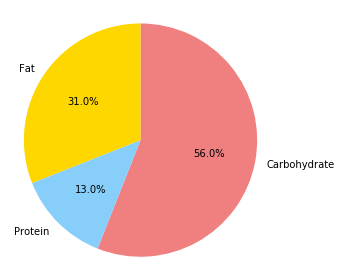

In [430]:
optimize_recipe(total_rec_recipes)

In [391]:
df.head()

,recipe,link,calorie,protein,protein ratio,fat ratio,carb ratio,your serving,recipe serving
Day 1,No Cream Pasta Primavera,https://www.allrecipes.com/recipe/86515/no-cre...,499.0,17.0,0.13,0.34,0.54,1.23,6.0
Day 2,Cajun Style Stuffed Peppers,https://www.allrecipes.com/recipe/38215/cajun-...,500.0,28.0,0.22,0.28,0.52,1.63,6.0
Day 3,Penne Pasta With Peas And Prosciutto,https://www.allrecipes.com/recipe/237141/penne...,498.0,24.0,0.19,0.14,0.69,0.71,4.0


References: 

https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://health.gov/dietaryguidelines/2015/resources/2015-2020_dietary_guidelines.pdf